### 기울기 소실과 기울기 폭발의 원인

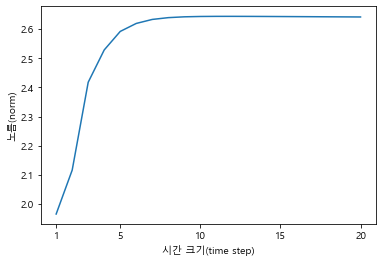

In [38]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

N = 2   # 미니배치 크기
H = 3   # 은닉 상태 벡터의 차원 수
T = 20  # 시계열 데이터의 길이

dh = np.ones((N, H))

np.random.seed(3) # 재현할 수 있도록 난수의 시드 고정

# Wh = np.random.randn(H, H)
# Wh = np.random.randn(H, H)*0.5
Wh = np.random.randn(H, H) * 0.7966
# print(Wh)

norm_list = []
for t in range(T):
    dh = np.dot(dh, Wh.T)  # (2,3)(3,3)=>(2,3)
    norm = np.sqrt(np.sum(dh**2)) / N
    norm_list.append(norm)

# print(norm_list)

# 그래프 그리기
plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('시간 크기(time step)')
plt.ylabel('노름(norm)')
plt.show()

### 기울기 폭발 대책

In [42]:
import numpy as np


dW = np.random.rand(3, 3) * 10
grads = [dW]
max_norm = 5.0

def clip_grads(grads, max_norm):
    total_norm = 0
    for grad in grads:
        total_norm += np.sum(grad ** 2)
    total_norm = np.sqrt(total_norm)

    print(total_norm)
    rate = max_norm / (total_norm + 1e-6)
    print(rate)
    if rate < 1:
        for grad in grads:
            grad *= rate


print('before:', dW.flatten())
clip_grads(grads, max_norm)

print(np.sqrt(np.sum(dW ** 2)))
print('after:', dW.flatten())

before: [2.25054505 4.06519916 4.68940249 2.69235578 2.91792774 4.57686399
 8.60533913 5.86252904 2.83487862]
14.026749590321954
0.3564617455627858
4.9999996435382545
after: [0.80223322 1.44908799 1.6715926  0.95972184 1.04012962 1.63147693
 3.06747421 2.08976734 1.01052578]


In [43]:
import numpy as np

dW1 = np.random.rand(3, 3) * 10
dW2 = np.random.rand(3, 3) * 10
grads = [dW1, dW2]
max_norm = 5.0


def clip_grads(grads, max_norm):
    total_norm = 0
    for grad in grads:
        total_norm += np.sum(grad ** 2)
    total_norm = np.sqrt(total_norm)

    rate = max_norm / (total_norm + 1e-6)
    print(rate)
    if rate < 1:
        for grad in grads:
            grad *= rate


print('before:', dW1.flatten())
clip_grads(grads, max_norm)
print('after:', dW1.flatten())

before: [2.77977507 4.54622076 2.05410345 2.01378711 5.1403506  0.87229369
 4.83585532 3.62176212 7.07686622]
0.23977375579376456
after: [0.66651711 1.09006443 0.4925201  0.4828533  1.23252117 0.20915313
 1.15951119 0.86840351 1.69684679]
